# Importing the Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset


In [69]:
dataset=pd.read_excel("Concrete_Data.xls")
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [61]:
dataset.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Data Visualization

In [91]:
data=dataset.iloc[0:,0:].values
data

array([[540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  79.98611076],
       [540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  61.88736576],
       [266.        , 114.        ,   0.        , ..., 670.        ,
         90.        ,  47.02984744],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
         28.        ,  23.69660064],
       [159.1       , 186.7       ,   0.        , ..., 788.9       ,
         28.        ,  32.76803638],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
         28.        ,  32.40123514]])

In [93]:
df = pd.DataFrame(data, columns = ['Cement', 'Blast Furnace Slag',  
                                    'Fly Ash', 'Water', 
                                    'Superplasticizer', 'Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength'] ) 
  

<AxesSubplot:>

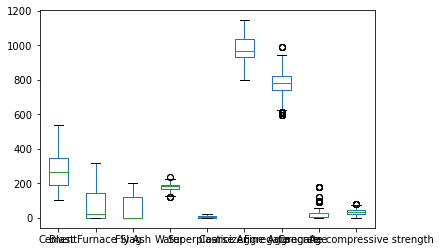

In [94]:
df.plot.box() 

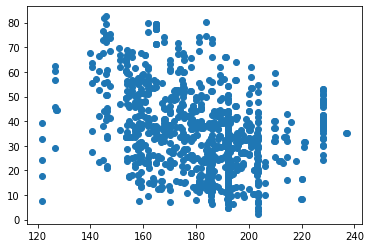

In [95]:
plt.scatter(df['Water'], df['Concrete compressive strength']) 
plt.show() 

# Taking care of missing data

In [5]:
dataset.isnull().any()


Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

# Outliers

In [62]:
data=dataset.iloc[0:,0:].values
data

array([[540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  79.98611076],
       [540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  61.88736576],
       [332.5       , 142.5       ,   0.        , ..., 594.        ,
        270.        ,  40.26953526],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
         28.        ,  23.69660064],
       [159.1       , 186.7       ,   0.        , ..., 788.9       ,
         28.        ,  32.76803638],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
         28.        ,  32.40123514]])

In [63]:
from scipy import stats
z=np.abs(stats.zscore(data))
threshold=3
np.where(z>threshold)

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
         35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
        122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
        620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 3, 3], dtype=int64))

In [70]:
dataset.drop(2,axis=0,inplace=True)
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [71]:
dataset.drop([3,4,6],axis=0,inplace=True)
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [72]:
dataset.drop([  12,  17,  24,  25,  26,  30,  31,  33,  34,
         35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
        122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
        620, 622, 756, 769, 792, 798, 814, 820, 873, 936],axis=0,inplace=True)
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [73]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)'>

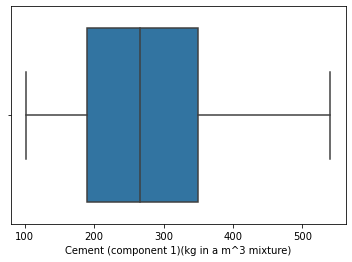

In [89]:
sns.boxplot(dataset['Cement (component 1)(kg in a m^3 mixture)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'>

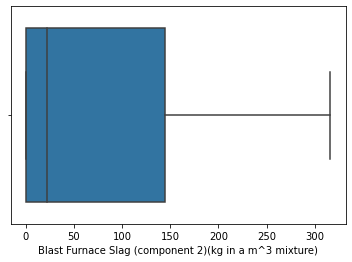

In [16]:
sns.boxplot(dataset['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)'>

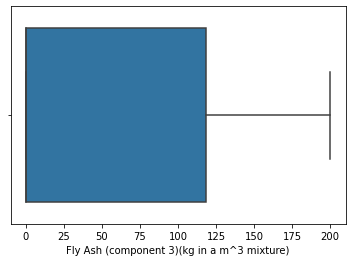

In [17]:
sns.boxplot(dataset['Fly Ash (component 3)(kg in a m^3 mixture)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)'>

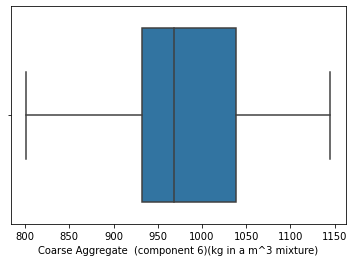

In [19]:
sns.boxplot(dataset['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])

# Splitting data into Train and Test¶

In [74]:
x=dataset.iloc[:,0:8].values
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 266. ,  114. ,    0. , ...,  932. ,  670. ,   90. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [75]:
y=dataset.iloc[:,-1].values
y

array([79.98611076, 61.88736576, 47.02984744, 36.44776979, 45.85429086,
       39.28978986, 38.07424367, 28.02168359, 42.32693164, 47.81378165,
       52.90831981, 39.35804798, 40.56325203, 42.62064842, 41.8367142 ,
       28.23748958,  8.06342182, 44.20782217, 52.1243856 , 37.42751518,
       38.60376124, 41.71950328, 30.07976945, 37.72192144, 42.22902605,
       36.2519586 , 50.45930106, 53.104131  , 41.54299743, 35.07640202,
       15.04919265, 40.75906322, 26.25800398, 32.82319446, 39.77931782,
       46.93194184, 33.11691123, 49.18514941, 14.58931216, 14.63826496,
        9.13142014, 50.94882902, 33.01900564,  9.86640156, 48.69562145,
       30.27558064, 40.85696881, 71.98818916, 34.39795764, 28.79941252,
       33.39821744, 36.3009114 , 28.99936056, 37.79707432, 33.39821744,
       28.096147  , 33.39821744, 25.2003478 , 41.09966436, 35.3011712 ,
       28.29609504, 28.59946448, 35.3011712 , 24.40055564, 35.3011712 ,
       39.300132  , 40.59634688, 35.3011712 , 24.0971862 , 46.20

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
mr=LinearRegression()

In [83]:
mr.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=mr.predict(x_test)
y_pred

array([58.03036567, 45.79463791, 57.98807248, 20.58903359, 38.88952998,
       60.76088426, 34.92532449, 53.00761892, 56.47485489, 37.02253464,
       24.91202985, 58.77726278, 44.63876584, 30.23997727, 34.2519766 ,
       67.27115274, 44.79833574, 18.87472939, 56.77838655, 52.81813466,
       16.21680298, 32.51263434, 51.62006299, 45.14221326, 66.26549891,
       12.18607658, 48.31318115, 31.17068649, 54.80172304, 34.71305328,
       54.15437784, 31.39009406, 38.9692816 , 26.81520045, 19.17151832,
       33.72369559, 19.70554857, 29.03178625, 32.96027272, 34.05512585,
       25.42306003, 25.36365685, 36.32596879, 23.95914613, 28.90873524,
       27.93302882, 28.31950379, 30.48942837, 31.58464491, 47.26064858,
       25.27381845, 50.5557434 , 12.4624883 , 30.8822972 , 42.16352319,
       19.75114246, 32.06643995, 38.18916059, 34.11070911, 30.36999817,
       22.5930371 , 52.90085975, 17.4894161 , 25.04589506, 30.44428659,
       11.18747526, 45.36756213, 59.9381833 , 44.16583734, 37.06

In [97]:
from joblib import dump
dump(mr,"pro1.save")

['pro1.save']

In [85]:
y_test

array([61.85584685, 47.8151606 , 53.104131  , 27.8748252 , 36.93522932,
       77.29715436, 44.39535964, 58.60546   , 52.20022796, 34.6806428 ,
       30.27558064, 74.36491146, 25.510612  , 33.19206412, 45.93978588,
       41.8367142 , 28.096147  , 35.22532884, 59.59042572, 49.20100736,
       11.41427518, 35.57006684, 67.30664712, 61.23581094, 40.75906322,
       10.7875415 , 35.36322404, 29.97841648, 74.98740976, 39.6621069 ,
       44.42293868, 33.39821744, 39.42147978, 29.23171397, 13.29309728,
       41.540929  , 11.98309288, 31.81242264, 37.36270444, 42.21661548,
       23.69660064, 19.10537996, 50.60064364, 27.22051248, 29.41304616,
       36.56291228, 27.923778  , 39.64487   , 31.35047372, 65.90701084,
       17.95947085, 50.07664188,  9.84965715, 35.2322236 , 39.37597436,
       16.27852836, 39.2656582 , 49.77327244, 42.69924868, 34.20490436,
       19.41564416, 41.36856   , 14.8437288 , 15.69109481, 39.300132  ,
       12.05204048, 39.00464228, 36.44570136, 48.67011084, 43.57

# Evaluation

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test,y_pred)

0.6249623362706431